# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [3]:
from requests import get
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

response = get(url)
print(response.text[:500])


<!doctype html>
<!--[if lt IE 7]> <html class="ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]> <html class="ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="ie8 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en"> <!--<![endif]-->
<head>
<script>
dataLayer =
[{
'language': 'en',
'loginState': false,
'pageName':'ps:'productgridutils.getfirstparentname(pdict.productsearchresult.category):productgridutils.getsecondparentname(pdict.productsearchresult.category):den


In [4]:
# scrape the data
import pandas as pd
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')



In [5]:
dog_containers = html_soup.find_all('div', class_ = 'product-tile')


In [6]:
dlist = []
for container in dog_containers:
    d ={}
    d['name'] = container.find('div', class_="product-name").text 
    dlist.append(d)


In [7]:
# load the data ito a dataframe file
df_dogs = pd.DataFrame(dlist)
df_dogs.head()

,name
0,\nGreenies Regular Dental Dog Treats\n
1,\nGreenies Petite Dental Dog Treats\n
2,\nGreenies Large Dental Dog Treats\n
3,\nPedigree Dentastix Large Dog Treats\n
4,\nGreenies 6 Month+ Puppy Petite Dental Dog Tr...


In [8]:
# Cleaning names of Data
df_dogs.replace(r'\n',  ' ', regex=True,inplace=True)


In [9]:
# save the data as a csv file
df_dogs.to_csv('data/part1.csv',index = False)

In [10]:
# display df.head()
df_dogs.head()

,name
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Tre...


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [11]:
import numpy as np

In [12]:
df = pd.read_csv('data/part2.csv')
df.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [13]:
def zscores(data):
    mu = data.mean()
    std = data.std()
    data_z = (data-mu)/std
    return data_z

In [14]:
# calculate the zscore for each column and store them as a new column with the names used above
df['salaries_zscores'] = zscores(df['salaries'])
df['NPS Score_zscores'] = zscores(df['NPS Score'])
df['evenOutcome_zscores'] = zscores(df['eventOutcome'])

In [15]:
df.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,evenOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

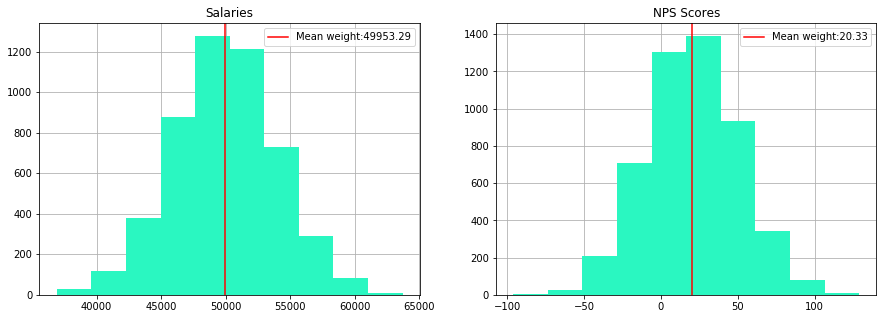

In [188]:
# plot for salaries and NPS Score data goes here
myfigure = plt.figure(figsize = (15,5))


ax1 = myfigure.add_subplot(121)
ax2 = myfigure.add_subplot(122)

# df['salaries'].hist(ax=ax1, color = '#2af7c1')
df['salaries'].hist( ax=ax1, color = '#2af7c1',zorder = 2)
df['NPS Score'].hist( ax=ax2, color = '#2af7c1',zorder = 2)

ax1.set_title('Salaries')
ax2.set_title('NPS Scores')

ax1.axvline(df['salaries'].mean(), color = 'Red', label = "Mean weight:" + str(round(df['salaries'].mean(),2)));
ax2.axvline(df['NPS Score'].mean(), color = 'Red', label = "Mean weight:" + str(round(df['NPS Score'].mean(),2)));

ax1.legend()
ax2.legend()

plt.show()

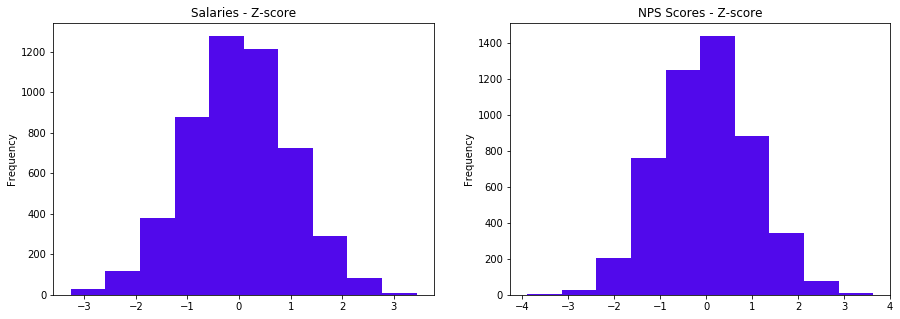

In [131]:
# plot for zscores for salaries and NPS Score data goes here
myfigure = plt.figure(figsize = (15,5))

ax1 = myfigure.add_subplot(121)
ax2 = myfigure.add_subplot(122)

df['salaries_zscores'].plot(kind='hist', ax=ax1, color = '#5109eb' )
df['NPS Score_zscores'].plot(kind='hist', ax=ax2, color = '#5109eb' )

ax1.set_title('Salaries - Z-score')
ax2.set_title('NPS Scores - Z-score')

plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [69]:
df['eventOutcome'].value_counts()

4    666
7    661
3    636
0    624
6    622
1    608
2    592
5    591
Name: eventOutcome, dtype: int64

In [71]:
eventcounter = {}
for event in df['eventOutcome']:
    eventcounter[event] = eventcounter.get(event,0)+1
eventcounter

{1: 608, 2: 592, 5: 591, 0: 624, 6: 622, 4: 666, 3: 636, 7: 661}

In [73]:
sum_events = sum(eventcounter.values())
sum_events

5000

In [75]:
pmf = list(map(lambda x: round(x/sum_events,3),eventcounter.values()))  
pmf

[0.122, 0.118, 0.118, 0.125, 0.124, 0.133, 0.127, 0.132]

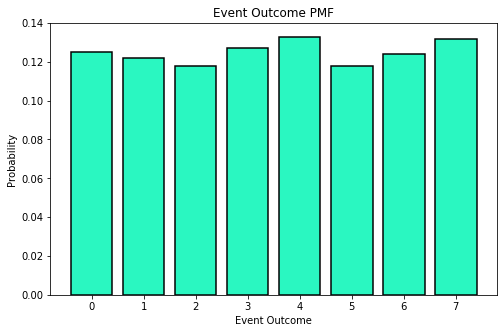

In [137]:

plt.figure(figsize=(8,5))

plt.bar(eventcounter.keys(), pmf,zorder = 2, color = '#2af7c1', linewidth = 1.5, edgecolor ='k')

plt.title("Event Outcome PMF")
plt.xlabel('Event Outcome')
plt.ylabel('Probability')
plt.ylim(0,0.14)
plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [82]:
import numpy as np

In [98]:
cumsum = list(np.cumsum(pmf))
cumsum
events = sorted(list(eventcounter.keys()))
events

[0, 1, 2, 3, 4, 5, 6, 7]

Text(0.5, 1.0, 'Cumulative Mass Function for Event Outcome')

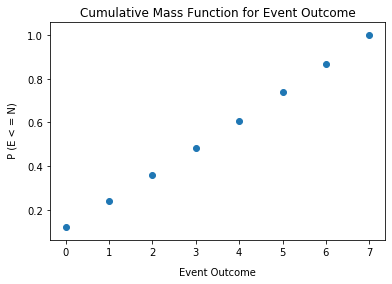

In [103]:
plt.scatter(events,cumsum)
plt.xlabel("Event Outcome", labelpad=10)
plt.ylabel(" P (E < = N)", labelpad=10)
plt.title("Cumulative Mass Function for Event Outcome")

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [106]:
# find salaries with zscores <= -2.0 

In [165]:
z_scores = df['salaries_zscores']
z_scores

0      -1.460155
1      -0.793981
2       0.014926
3      -0.242545
4       0.199405
          ...   
4995    0.156660
4996    1.143046
4997   -0.954463
4998   -0.682494
4999   -0.510014
Name: salaries_zscores, Length: 5000, dtype: float64

In [172]:
salaries_z_under2 = list(np.where(z_scores <=-2)[0])
salaries_z_under2

[20,
 41,
 89,
 107,
 285,
 286,
 291,
 303,
 338,
 399,
 408,
 411,
 415,
 445,
 454,
 489,
 554,
 570,
 640,
 658,
 687,
 690,
 746,
 767,
 781,
 784,
 792,
 839,
 873,
 915,
 962,
 977,
 1049,
 1113,
 1124,
 1173,
 1184,
 1197,
 1221,
 1246,
 1303,
 1306,
 1312,
 1337,
 1344,
 1360,
 1526,
 1565,
 1626,
 1646,
 1763,
 1764,
 1879,
 1931,
 1958,
 1966,
 1983,
 2013,
 2025,
 2052,
 2161,
 2314,
 2356,
 2391,
 2396,
 2452,
 2622,
 2630,
 2640,
 2685,
 2731,
 2802,
 2888,
 2894,
 2908,
 2965,
 2982,
 3036,
 3129,
 3173,
 3262,
 3287,
 3292,
 3293,
 3317,
 3379,
 3432,
 3445,
 3496,
 3546,
 3582,
 3646,
 3656,
 3708,
 3709,
 3761,
 3918,
 3953,
 4018,
 4038,
 4062,
 4116,
 4122,
 4155,
 4158,
 4168,
 4174,
 4181,
 4211,
 4276,
 4308,
 4341,
 4346,
 4448,
 4458,
 4506,
 4528,
 4571,
 4692,
 4707,
 4731,
 4765,
 4949]

In [173]:
len(salaries_z_under2)

123

In [147]:
# Checking to see if they match up
df.loc[df['salaries_zscores'] < -2.0]

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,evenOutcome_zscores
20,39383.0,47.0,1,-2.642269,0.891659,-1.103166
41,38063.0,2.0,5,-2.972231,-0.612658,0.637118
89,41458.0,65.0,7,-2.123578,1.493386,1.507260
107,40854.0,27.0,4,-2.274561,0.223074,0.202047
285,40886.0,43.0,5,-2.266562,0.757942,0.637118
...,...,...,...,...,...,...
4692,38341.0,37.0,3,-2.902739,0.557366,-0.233024
4707,41813.0,96.0,1,-2.034839,2.529693,-1.103166
4731,41184.0,21.0,0,-2.192071,0.022498,-1.538237
4765,40108.0,43.0,2,-2.461040,0.757942,-0.668095


In [ ]:
# Both have 123 entries

In [107]:
# calculate skewness and kurtosis of NPS Score column

In [190]:
from scipy.stats import kurtosis, skew

In [191]:
print ('Skewness =', skew(df['NPS Score']))
print ('kurtosis =', kurtosis(df['NPS Score']))

Skewness = 0.02450527688165856
kurtosis = -0.04212714461681166


# run the cell below to convert your notebook to a README for assessment

In [189]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 15514 bytes to assessment.md
